# Precision/Recall, F1 Score, Confusion Matrix

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#the following gives access to utils folder
#where utils package stores shared code
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.getcwd(),
                  os.pardir)
)

#only add it once
if (PROJECT_ROOT not in sys.path):
    sys.path.append(PROJECT_ROOT)
import utils as ut

# <mark>Load credit Data, a very unbalanced dataset

In [32]:
df = pd.read_csv('creditcard_small.csv')
# df = pd.read_csv('creditcard.csv')


print(f'number rows={len(df)}')
df.head()

number rows=2848


,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [33]:
#very imbalanced
df.Class.value_counts()

Class
0    2846
1       2
Name: count, dtype: int64

In [34]:
# # save a subset for demo purposes
# #sample, then clean up index
# df1=df.sample( frac=.01, replace=False, weights=None, random_state=42).reset_index(drop=True)
# print(f'there are {len(df1)} rows in df')
# df1.head()

# df1.to_csv('creditcard_small.csv')

## Create a crummy model that always predicts 0

In [35]:
class Always0:
    def predict(ds):
        if ( not isinstance(ds,pd.DataFrame)):
            raise ValueError("ds must be a dataframe")
        return np.zeros(len(ds))

mod= Always0()

In [36]:
# df['Class'].dtype

In [37]:
#df[30] is type O, force it to int
# df['Class']=df['Class'].astype('int')

In [38]:
from sklearn.metrics import accuracy_score
res=Always0.predict(df)
base_score=accuracy_score(df['Class'], res)
print(f'Always0 is %{base_score*100} accurate!')

Always0 is %99.92977528089888 accurate!


## Lets see what precision and recall say

In [39]:
from sklearn.metrics import precision_score
precision = precision_score(df['Class'], res, average='binary',)
print('Precision: %.3f' % precision)

Precision: 0.000


/home/keith/anaconda3/envs/p311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import recall_score
recall = recall_score(df['Class'], res, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.000


In [41]:
from sklearn.metrics import f1_score
f1 = f1_score(df['Class'], res, average='binary')
print('f1_score: %.3f' % f1)

f1_score: 0.000


## So it appears to be a pretty crappy classifier if we use anything other than accuracy

Credit score has so few frauds that it will be difficult to detect them

# <mark>Load breast cancer data
See <a href="https://github.com/wolfecameron/MachineLearning/blob/master/breast_cancer_classification.py">Breast Cancer Diagnosis</a> for original source

In [42]:
from sklearn.datasets import load_breast_cancer 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data, target = load_breast_cancer(return_X_y=True)

target = pd.DataFrame(target)
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
#any nulls?
df.isnull().sum().sum()

0

## Any correlations?  If so dump em

In [47]:
df=ut.drop_correlated_columns(df, .95)

## Create a classifier

In [46]:
# instantiate the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( oob_score=True, n_jobs=-1)

## split the data set into training and testing data

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target)

## Fit it

In [49]:
# fit the model to the data and find the baseline accuracy
rf.fit(x_train, y_train.squeeze())
accuracy = rf.oob_score_
accuracy

0.9530516431924883

## Lets look in on Precision and recall

In [50]:
from sklearn.metrics import classification_report
res = rf.predict(x_test)
prec_rec = classification_report(res, y_test)
print (prec_rec)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.98      0.97      0.97        95

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



## And finaly the confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, res)

array([[46,  3],
       [ 2, 92]])

In [52]:
#a little imbalanced (2 to 1)
y_test.value_counts()

1    94
0    49
Name: count, dtype: int64

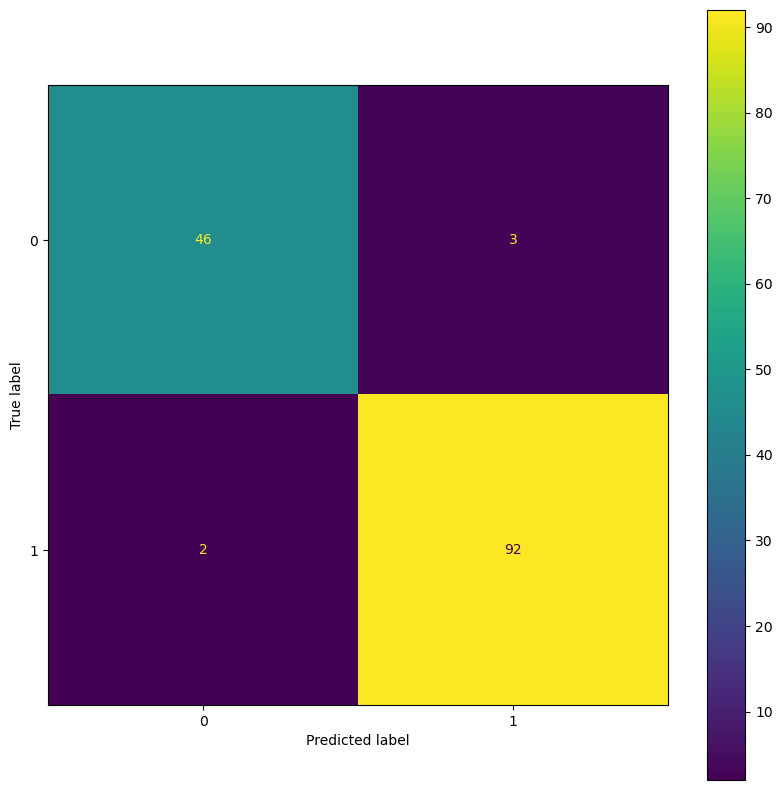

In [53]:
# Thats confusion matrix  little lean in terms of content
#but easy to harness programatically
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, res, labels=[0,1])
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1]).plot(ax=ax)